In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

tickers = ['SPY', 'AAPL', 'NVDA', 'TSLA']
prices = yf.download(tickers, start="2020-01-01", end=None)['Close']

log_returns = np.log(prices / prices.shift(1)).dropna()

normalized = prices / prices.iloc[0]
normalized_prices = (prices / prices.iloc[0]) * 100


/tmp/ipython-input-3631758287.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start="2020-01-01", end=None)['Close']
[*********************100%***********************]  4 of 4 completed


<Figure size 1200x600 with 0 Axes>

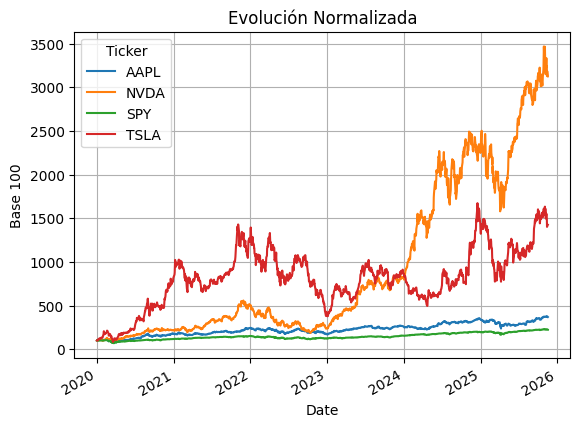

In [13]:
plt.figure(figsize=(12, 6))
normalized_prices.plot()
plt.title('Evolución Normalizada')
plt.ylabel('Base 100')
plt.grid(True)
plt.show()

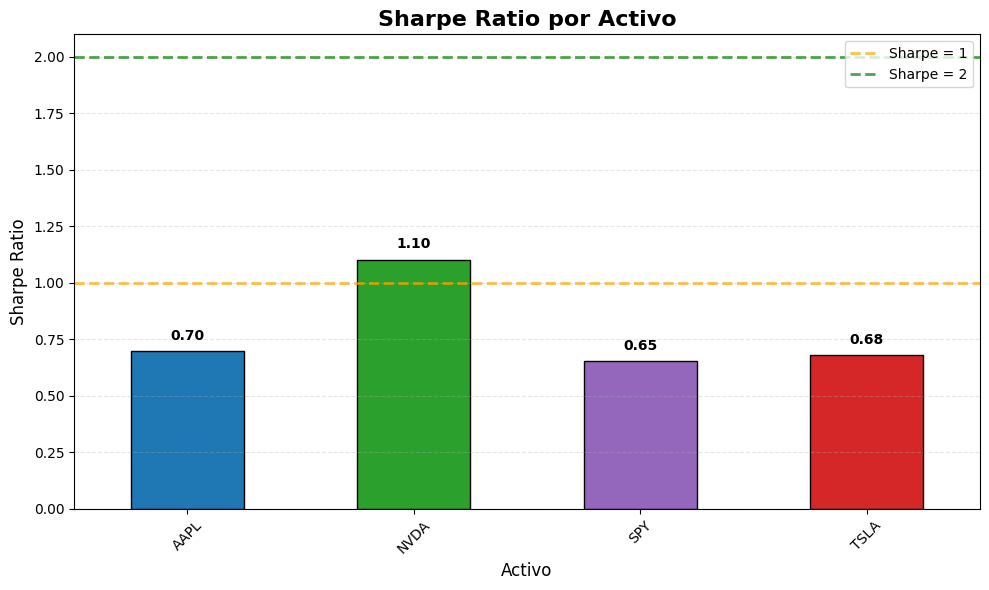


📈 RESUMEN COMPLETO DE TODOS LOS ACTIVOS
        Retorno Anual (%)  Volatilidad (%)  Sharpe Ratio
Ticker                                                  
NVDA                58.73            53.25          1.10
AAPL                22.28            32.01          0.70
TSLA                45.34            66.82          0.68
SPY                 13.68            20.95          0.65

✅ Mejor Sharpe Ratio:  NVDA (1.1)
❌ Peor Sharpe Ratio:  SPY (0.65)


In [17]:
average_daily_return = log_returns.mean()
annual_return = average_daily_return * 252
annual_volatility = log_returns.std() * np.sqrt(252)
sharpe_ratio = annual_return / annual_volatility

plt.figure(figsize=(10, 6))

sharpe_ratio.plot(kind='bar',
                  color=['#1f77b4', '#2ca02c', '#9467bd', '#d62728'],
                  edgecolor='black')

plt.title('Sharpe Ratio por Activo', fontsize=16, fontweight='bold')
plt.ylabel('Sharpe Ratio', fontsize=12)
plt.xlabel('Activo', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.axhline(y=1, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Sharpe = 1')
plt.axhline(y=2, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Sharpe = 2')

for i, v in enumerate(sharpe_ratio):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

results = pd.DataFrame({
    'Retorno Anual (%)': (annual_return * 100).round(2),
    'Volatilidad (%)': (annual_volatility * 100).round(2),
    'Sharpe Ratio': sharpe_ratio.round(2)
})

results = results.sort_values('Sharpe Ratio', ascending=False)

print("\n" + "=" * 60)
print("📈 RESUMEN COMPLETO DE TODOS LOS ACTIVOS")
print("=" * 60)
print(results)
print("\n✅ Mejor Sharpe Ratio: ", results.index[0], f"({results['Sharpe Ratio'].iloc[0]})")
print("❌ Peor Sharpe Ratio: ", results.index[-1], f"({results['Sharpe Ratio'].iloc[-1]})")

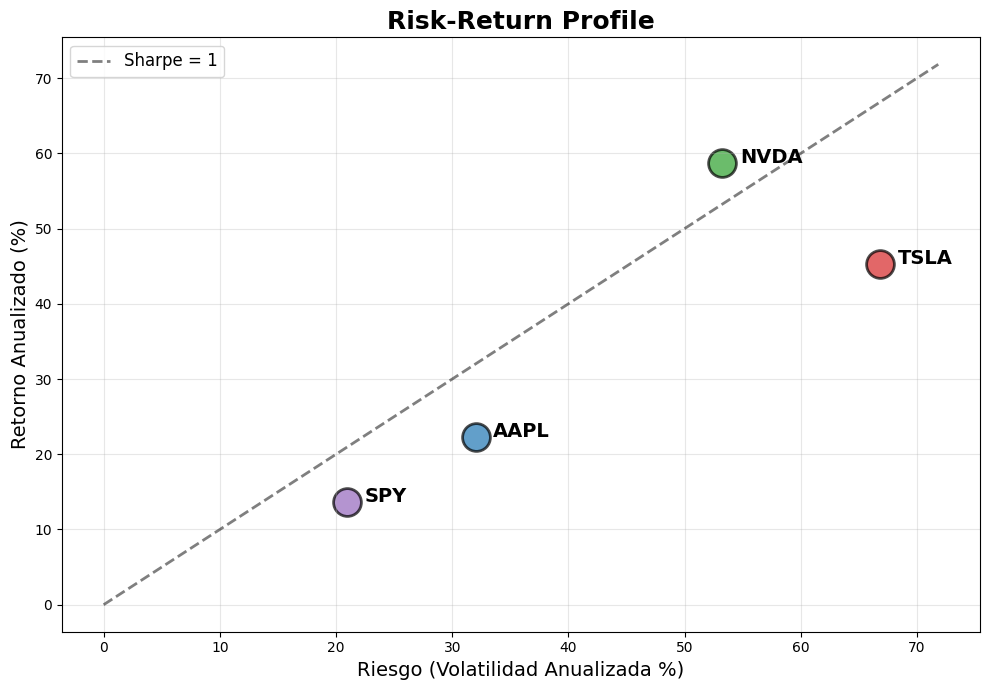

In [18]:
plt.figure(figsize=(10, 7))

colors = ['#1f77b4', '#2ca02c', '#9467bd', '#d62728']

for i, ticker in enumerate(annual_return.index):
    x = annual_volatility[ticker] * 100  # Volatilidad %
    y = annual_return[ticker] * 100      # Retorno %

    plt.scatter(x, y, s=400, alpha=0.7, color=colors[i], edgecolor='black', linewidth=2)
    plt.text(x + 1.5, y, ticker, fontsize=14, fontweight='bold')

plt.title('Risk-Return Profile', fontsize=18, fontweight='bold')
plt.xlabel('Riesgo (Volatilidad Anualizada %)', fontsize=14)
plt.ylabel('Retorno Anualizado (%)', fontsize=14)
plt.grid(True, alpha=0.3)

max_vol = (annual_volatility * 100).max()
x_line = np.linspace(0, max_vol + 5, 100)
plt.plot(x_line, x_line, 'k--', alpha=0.5, linewidth=2, label='Sharpe = 1')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
correlation_matrix = log_returns.corr()

print("=" * 50)
print("📊 MATRIZ DE CORRELACIÓN")
print("=" * 50)
print(correlation_matrix.round(2))

📊 MATRIZ DE CORRELACIÓN
Ticker  AAPL  NVDA   SPY  TSLA
Ticker                        
AAPL    1.00  0.58  0.79  0.50
NVDA    0.58  1.00  0.71  0.48
SPY     0.79  0.71  1.00  0.54
TSLA    0.50  0.48  0.54  1.00


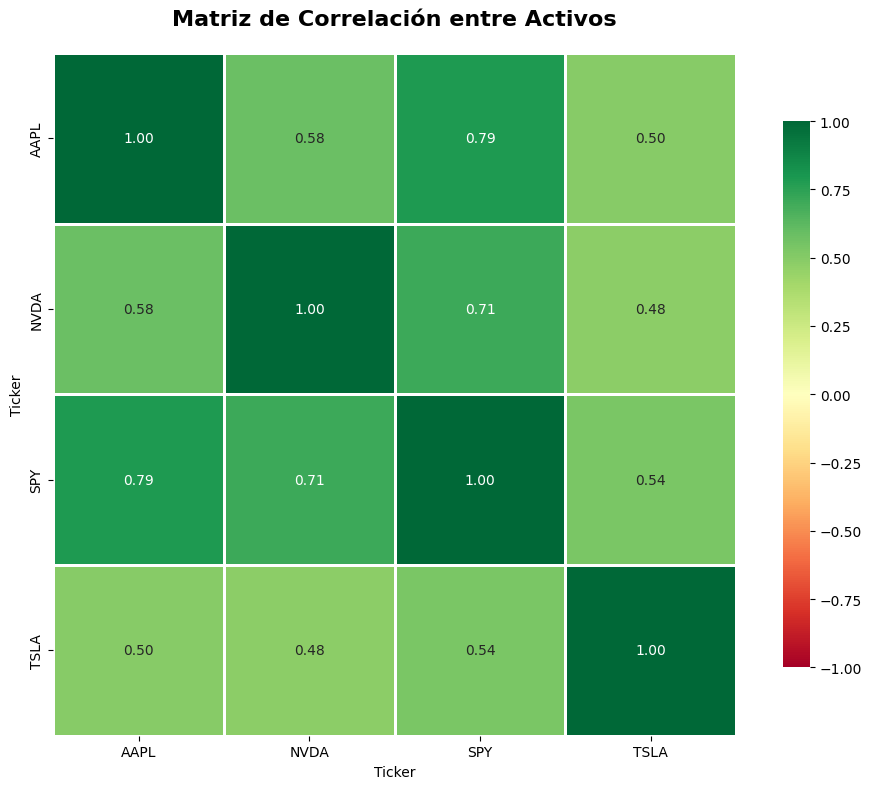

In [20]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
            annot=True,           # Muestra los números
            cmap='RdYlGn',        # Rojo = baja, Verde = alta
            center=0,             # Centro en 0
            vmin=-1, vmax=1,      # Escala de -1 a 1
            square=True,          # Celdas cuadradas
            linewidths=2,         # Líneas entre celdas
            cbar_kws={"shrink": 0.8},
            fmt='.2f')            # 2 decimales

plt.title('Matriz de Correlación entre Activos', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

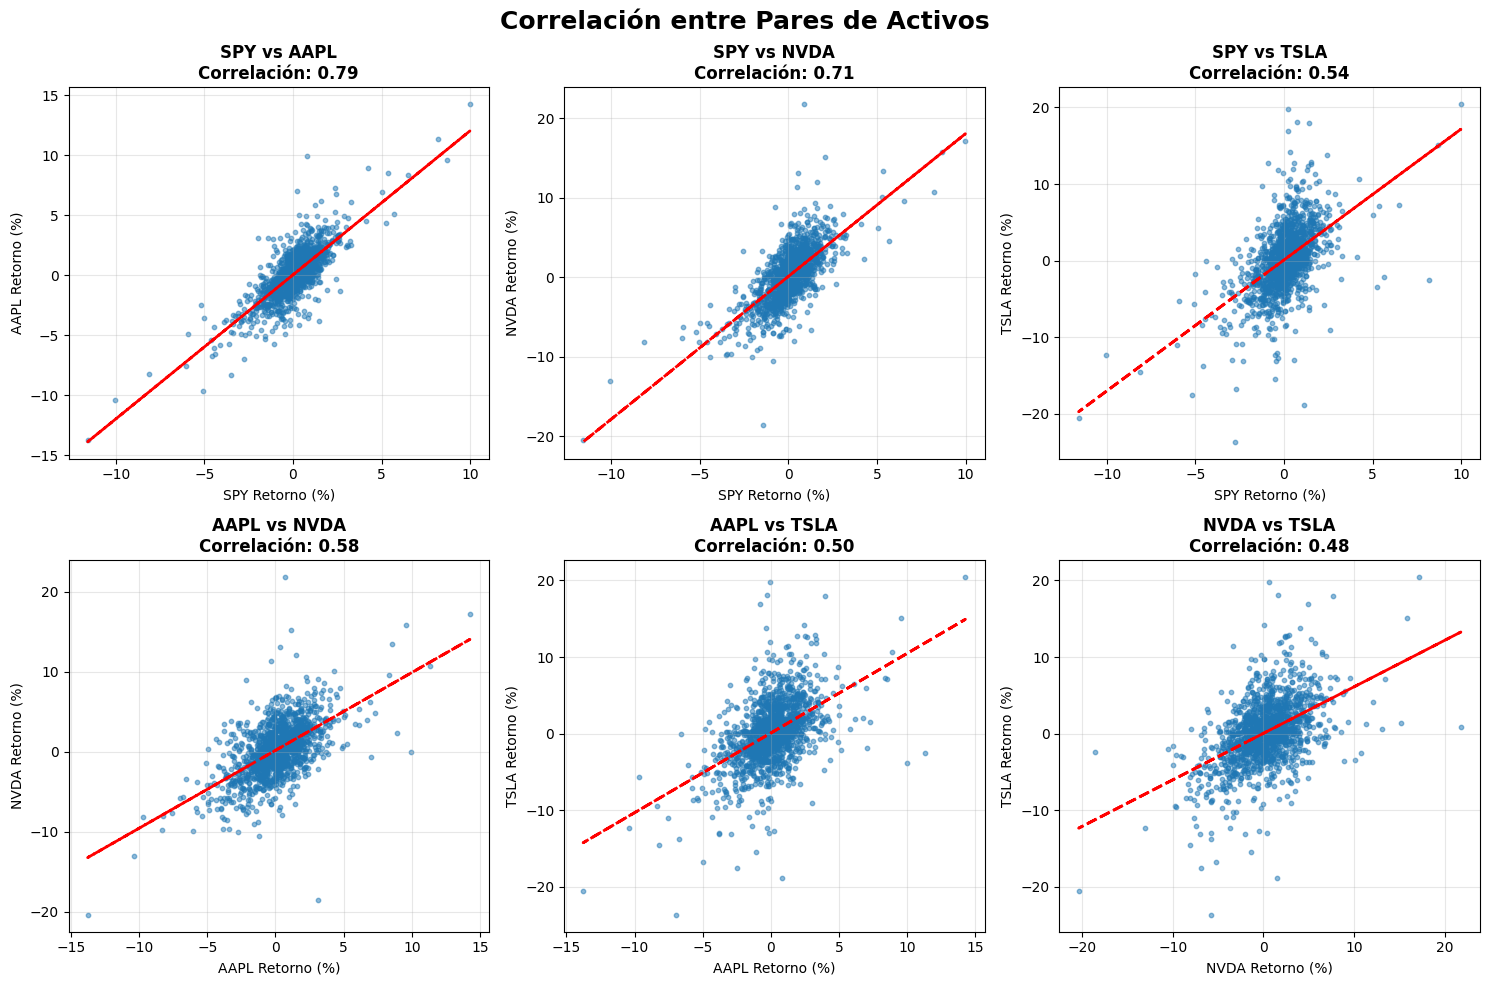

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Correlación entre Pares de Activos', fontsize=18, fontweight='bold')

pairs = [
    ('SPY', 'AAPL'),
    ('SPY', 'NVDA'),
    ('SPY', 'TSLA'),
    ('AAPL', 'NVDA'),
    ('AAPL', 'TSLA'),
    ('NVDA', 'TSLA')
]

for idx, (asset1, asset2) in enumerate(pairs):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Scatter plot
    ax.scatter(log_returns[asset1] * 100,
               log_returns[asset2] * 100,
               alpha=0.5,
               s=10)


    z = np.polyfit(log_returns[asset1], log_returns[asset2], 1)
    p = np.poly1d(z)
    ax.plot(log_returns[asset1] * 100,
            p(log_returns[asset1]) * 100,
            "r--",
            linewidth=2)


    corr = correlation_matrix.loc[asset1, asset2]
    ax.set_xlabel(f'{asset1} Retorno (%)', fontsize=10)
    ax.set_ylabel(f'{asset2} Retorno (%)', fontsize=10)
    ax.set_title(f'{asset1} vs {asset2}\nCorrelación: {corr:.2f}', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
num_portfolios = 10000
num_assets = len(tickers)


portfolio_returns = []
portfolio_volatilities = []
portfolio_weights_list = []
sharpe_ratios = []


mean_returns = log_returns.mean() * 252
cov_matrix = log_returns.cov() * 252

print("🎲 Simulando 10,000 portafolios aleatorios...")


np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)


    portfolio_return = np.sum(weights * mean_returns)


    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))


    sharpe = portfolio_return / portfolio_volatility

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_weights_list.append(weights)
    sharpe_ratios.append(sharpe)

print("✅ Simulación completada!")


portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
sharpe_ratios = np.array(sharpe_ratios)

🎲 Simulando 10,000 portafolios aleatorios...
✅ Simulación completada!


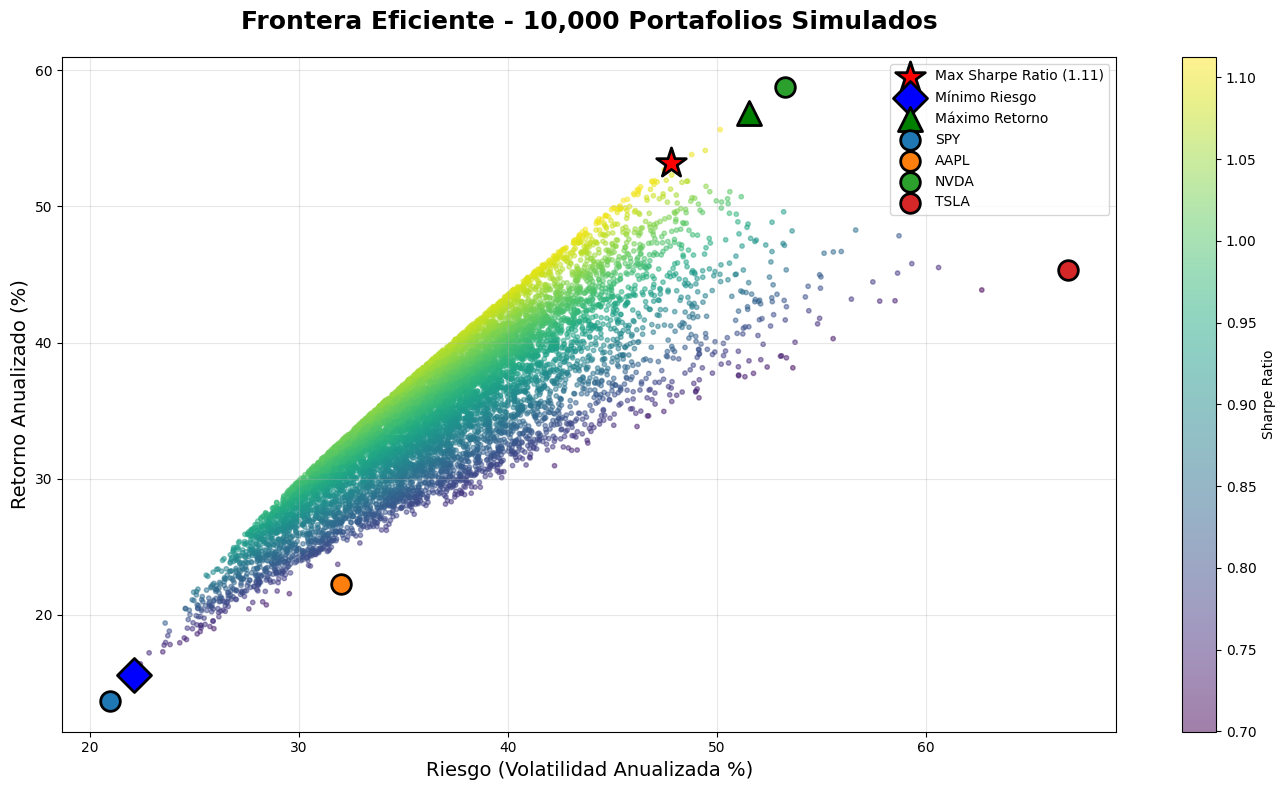

In [23]:
plt.figure(figsize=(14, 8))

scatter = plt.scatter(portfolio_volatilities * 100,
                     portfolio_returns * 100,
                     c=sharpe_ratios,
                     cmap='viridis',
                     alpha=0.5,
                     s=10)

plt.colorbar(scatter, label='Sharpe Ratio')

max_sharpe_idx = np.argmax(sharpe_ratios)
min_vol_idx = np.argmin(portfolio_volatilities)
max_return_idx = np.argmax(portfolio_returns)

plt.scatter(portfolio_volatilities[max_sharpe_idx] * 100,
           portfolio_returns[max_sharpe_idx] * 100,
           marker='*', color='red', s=500,
           label=f'Max Sharpe Ratio ({sharpe_ratios[max_sharpe_idx]:.2f})',
           edgecolors='black', linewidth=2)

plt.scatter(portfolio_volatilities[min_vol_idx] * 100,
           portfolio_returns[min_vol_idx] * 100,
           marker='D', color='blue', s=300,
           label='Mínimo Riesgo',
           edgecolors='black', linewidth=2)

plt.scatter(portfolio_volatilities[max_return_idx] * 100,
           portfolio_returns[max_return_idx] * 100,
           marker='^', color='green', s=300,
           label='Máximo Retorno',
           edgecolors='black', linewidth=2)

for i, ticker in enumerate(tickers):
    plt.scatter(annual_volatility[ticker] * 100,
               annual_return[ticker] * 100,
               marker='o', s=200,
               label=f'{ticker}',
               edgecolors='black', linewidth=2)

plt.title('Frontera Eficiente - 10,000 Portafolios Simulados',
         fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Riesgo (Volatilidad Anualizada %)', fontsize=14)
plt.ylabel('Retorno Anualizado (%)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:

optimal_portfolios = pd.DataFrame({
    'SPY': [portfolio_weights_list[max_sharpe_idx][0],
            portfolio_weights_list[min_vol_idx][0],
            portfolio_weights_list[max_return_idx][0]],
    'AAPL': [portfolio_weights_list[max_sharpe_idx][1],
             portfolio_weights_list[min_vol_idx][1],
             portfolio_weights_list[max_return_idx][1]],
    'NVDA': [portfolio_weights_list[max_sharpe_idx][2],
             portfolio_weights_list[min_vol_idx][2],
             portfolio_weights_list[max_return_idx][2]],
    'TSLA': [portfolio_weights_list[max_sharpe_idx][3],
             portfolio_weights_list[min_vol_idx][3],
             portfolio_weights_list[max_return_idx][3]],
    'Retorno (%)': [portfolio_returns[max_sharpe_idx] * 100,
                    portfolio_returns[min_vol_idx] * 100,
                    portfolio_returns[max_return_idx] * 100],
    'Volatilidad (%)': [portfolio_volatilities[max_sharpe_idx] * 100,
                        portfolio_volatilities[min_vol_idx] * 100,
                        portfolio_volatilities[max_return_idx] * 100],
    'Sharpe Ratio': [sharpe_ratios[max_sharpe_idx],
                     sharpe_ratios[min_vol_idx],
                     sharpe_ratios[max_return_idx]]
}, index=['Max Sharpe', 'Min Volatilidad', 'Max Retorno'])

print("\n" + "=" * 80)
print("🏆 PORTAFOLIOS ÓPTIMOS")
print("=" * 80)
print(optimal_portfolios.round(3))

print("\n" + "=" * 80)
print("📊 PESOS DEL MEJOR PORTAFOLIO (Max Sharpe)")
print("=" * 80)
best_weights = optimal_portfolios.loc['Max Sharpe', ['SPY', 'AAPL', 'NVDA', 'TSLA']]
for ticker, weight in best_weights.items():
    print(f"{ticker:6s}: {weight*100:6.2f}%")


🏆 PORTAFOLIOS ÓPTIMOS
                   SPY   AAPL   NVDA   TSLA  Retorno (%)  Volatilidad (%)  \
Max Sharpe       0.092  0.796  0.021  0.091       53.206           47.823   
Min Volatilidad  0.009  0.001  0.933  0.058       15.615           22.105   
Max Retorno      0.026  0.952  0.020  0.002       56.835           51.541   

                 Sharpe Ratio  
Max Sharpe              1.113  
Min Volatilidad         0.706  
Max Retorno             1.103  

📊 PESOS DEL MEJOR PORTAFOLIO (Max Sharpe)
SPY   :   9.17%
AAPL  :  79.61%
NVDA  :   2.13%
TSLA  :   9.08%


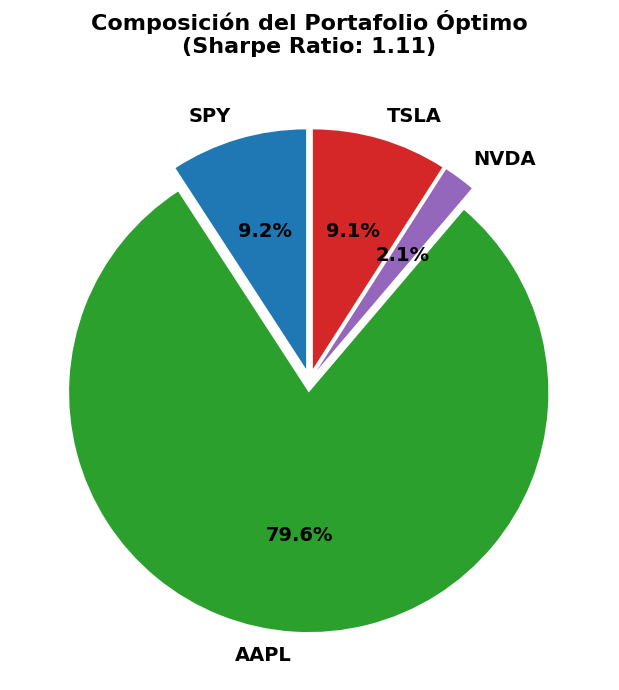

In [25]:
plt.figure(figsize=(10, 7))

best_weights = portfolio_weights_list[max_sharpe_idx]
colors = ['#1f77b4', '#2ca02c', '#9467bd', '#d62728']

plt.pie(best_weights,
        labels=tickers,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 14, 'fontweight': 'bold'},
        explode=[0.05, 0.05, 0.05, 0.05])

plt.title(f'Composición del Portafolio Óptimo\n(Sharpe Ratio: {sharpe_ratios[max_sharpe_idx]:.2f})',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [26]:
from scipy.optimize import minimize

def negative_sharpe(weights):
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0, 1) for _ in range(num_assets))

initial_weights = np.array([0.25, 0.25, 0.25, 0.25])

result = minimize(negative_sharpe,
                 initial_weights,
                 method='SLSQP',
                 bounds=bounds,
                 constraints=constraints)

optimal_weights = result.x
optimal_return = np.sum(optimal_weights * mean_returns)
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
optimal_sharpe = optimal_return / optimal_volatility

print("\n" + "=" * 60)
print("🎯 PORTAFOLIO ÓPTIMO (Optimización Matemática)")
print("=" * 60)
for i, ticker in enumerate(tickers):
    print(f"{ticker:6s}: {optimal_weights[i]*100:6.2f}%")
print(f"\nRetorno:     {optimal_return*100:.2f}%")
print(f"Volatilidad: {optimal_volatility*100:.2f}%")
print(f"Sharpe:      {optimal_sharpe:.3f}")


🎯 PORTAFOLIO ÓPTIMO (Optimización Matemática)
SPY   :   2.44%
AAPL  :  85.12%
NVDA  :   0.00%
TSLA  :  12.44%

Retorno:     56.17%
Volatilidad: 50.37%
Sharpe:      1.115


In [27]:
comparison = pd.DataFrame({
    'Método': ['Monte Carlo (Simulación)', 'Optimización Matemática'],
    'Sharpe Ratio': [sharpe_ratios[max_sharpe_idx], optimal_sharpe],
    'Retorno (%)': [portfolio_returns[max_sharpe_idx]*100, optimal_return*100],
    'Volatilidad (%)': [portfolio_volatilities[max_sharpe_idx]*100, optimal_volatility*100]
})

print("\n" + "=" * 60)
print("⚖️ COMPARACIÓN DE MÉTODOS")
print("=" * 60)
print(comparison.round(3))


⚖️ COMPARACIÓN DE MÉTODOS
                     Método  Sharpe Ratio  Retorno (%)  Volatilidad (%)
0  Monte Carlo (Simulación)         1.113       53.206           47.823
1   Optimización Matemática         1.115       56.170           50.365


In [28]:
comparison = pd.DataFrame({
    'Método': ['Monte Carlo (Simulación)', 'Optimización Matemática'],
    'Sharpe Ratio': [sharpe_ratios[max_sharpe_idx], optimal_sharpe],
    'Retorno (%)': [portfolio_returns[max_sharpe_idx]*100, optimal_return*100],
    'Volatilidad (%)': [portfolio_volatilities[max_sharpe_idx]*100, optimal_volatility*100]
})

print("\n" + "=" * 60)
print("⚖️ COMPARACIÓN DE MÉTODOS")
print("=" * 60)
print(comparison.round(3))


⚖️ COMPARACIÓN DE MÉTODOS
                     Método  Sharpe Ratio  Retorno (%)  Volatilidad (%)
0  Monte Carlo (Simulación)         1.113       53.206           47.823
1   Optimización Matemática         1.115       56.170           50.365


In [29]:
print("=" * 70)
print(" " * 15 + "📊 REPORTE DE INVERSIÓN")
print("=" * 70)

print("\n1️⃣ ACTIVOS ANALIZADOS:")
print(f"   {', '.join(tickers)}")
print(f"   Período: 2020-01-01 a {prices.index[-1].strftime('%Y-%m-%d')}")

print("\n2️⃣ RENDIMIENTO INDIVIDUAL:")
for ticker in tickers:
    total_return = (prices[ticker].iloc[-1] / prices[ticker].iloc[0] - 1) * 100
    print(f"   {ticker}: {total_return:+.2f}%")

print("\n3️⃣ RIESGO (Volatilidad Anualizada):")
for ticker in tickers:
    print(f"   {ticker}: {annual_volatility[ticker]*100:.2f}%")

print("\n4️⃣ EFICIENCIA (Sharpe Ratio):")
for ticker in tickers:
    print(f"   {ticker}: {sharpe_ratio[ticker]:.3f}")

print("\n5️⃣ PORTAFOLIO ÓPTIMO:")
print(f"   Sharpe Ratio: {optimal_sharpe:.3f}")
print(f"   Retorno Esperado: {optimal_return*100:.2f}%")
print(f"   Volatilidad: {optimal_volatility*100:.2f}%")
print("\n   Composición:")
for i, ticker in enumerate(tickers):
    print(f"   {ticker}: {optimal_weights[i]*100:.2f}%")

print("\n6️⃣ CONCLUSIÓN:")
print(f"   El portafolio óptimo supera a invertir en un solo activo")
print(f"   Diversificación reduce riesgo en ~{((annual_volatility.max() - optimal_volatility) / annual_volatility.max() * 100):.1f}%")
print("=" * 70)

               📊 REPORTE DE INVERSIÓN

1️⃣ ACTIVOS ANALIZADOS:
   SPY, AAPL, NVDA, TSLA
   Período: 2020-01-01 a 2025-11-17

2️⃣ RENDIMIENTO INDIVIDUAL:
   SPY: +122.95%
   AAPL: +269.07%
   NVDA: +3024.89%
   TSLA: +1325.60%

3️⃣ RIESGO (Volatilidad Anualizada):
   SPY: 20.95%
   AAPL: 32.01%
   NVDA: 53.25%
   TSLA: 66.82%

4️⃣ EFICIENCIA (Sharpe Ratio):
   SPY: 0.653
   AAPL: 0.696
   NVDA: 1.103
   TSLA: 0.678

5️⃣ PORTAFOLIO ÓPTIMO:
   Sharpe Ratio: 1.115
   Retorno Esperado: 56.17%
   Volatilidad: 50.37%

   Composición:
   SPY: 2.44%
   AAPL: 85.12%
   NVDA: 0.00%
   TSLA: 12.44%

6️⃣ CONCLUSIÓN:
   El portafolio óptimo supera a invertir en un solo activo
   Diversificación reduce riesgo en ~24.6%
